<font size =8> Decorators with Python Overview

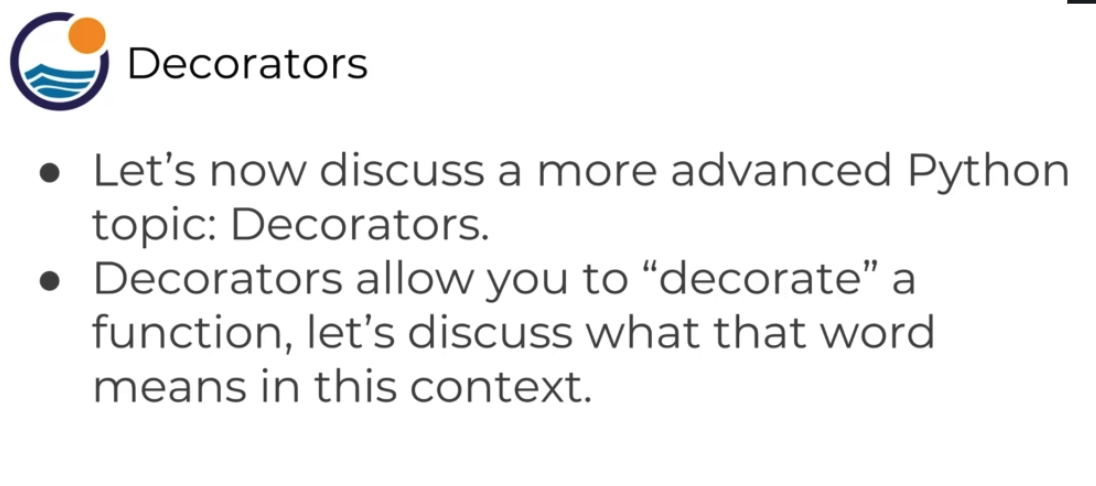

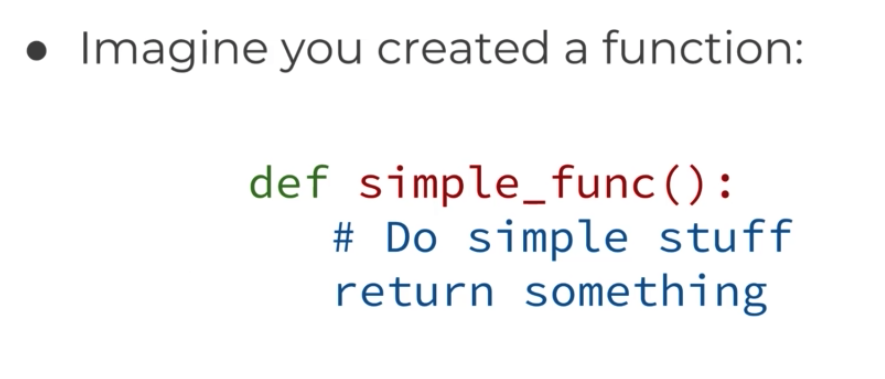

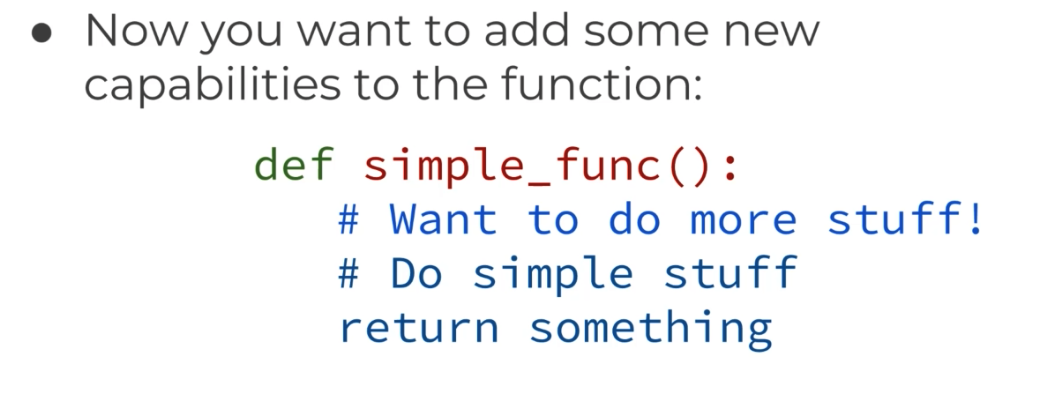

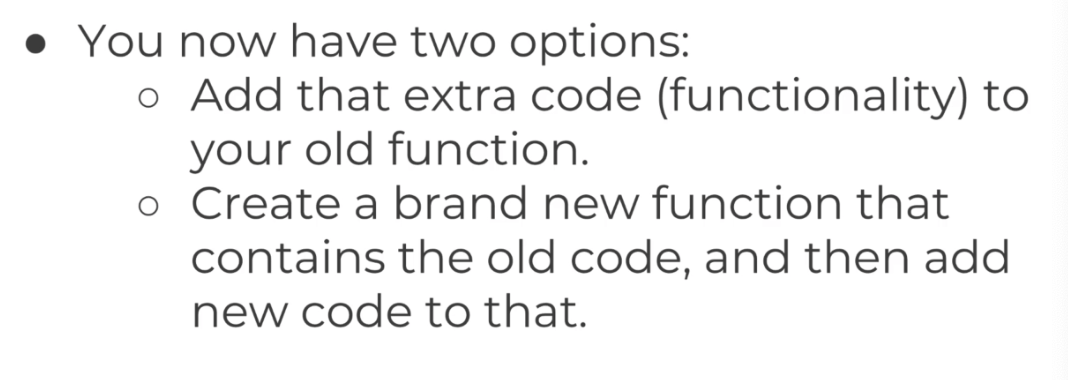

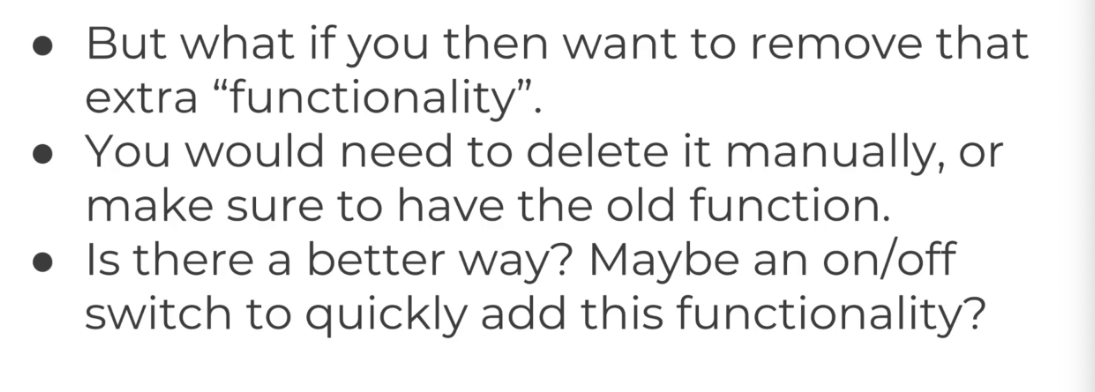

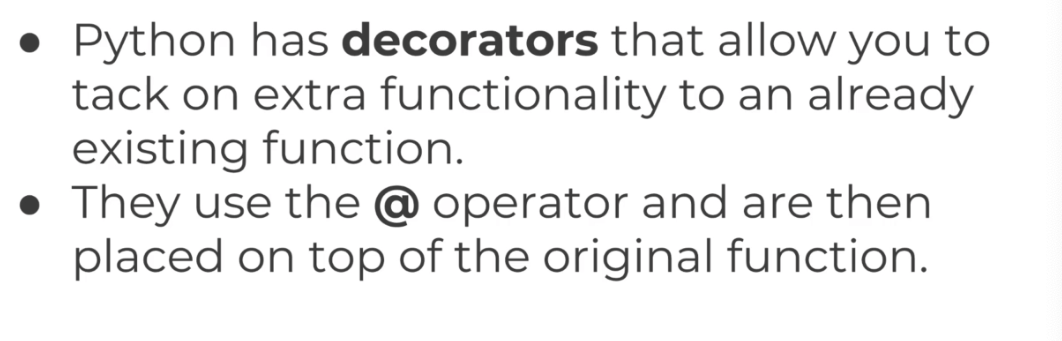

In [1]:
# add extra functionality to an existing function

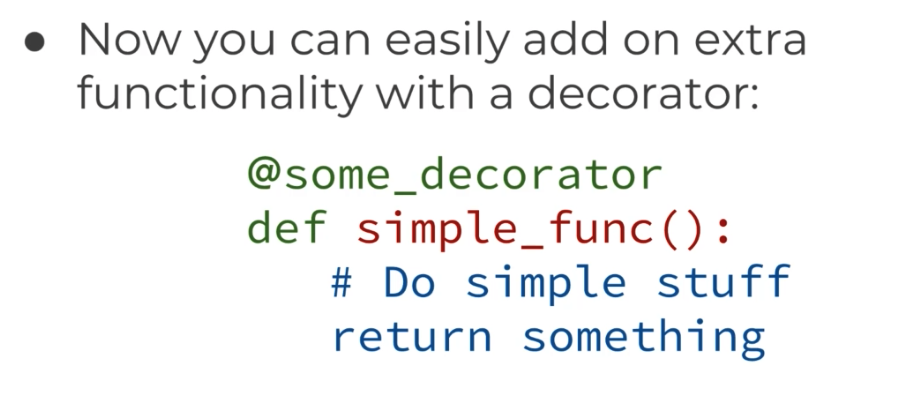

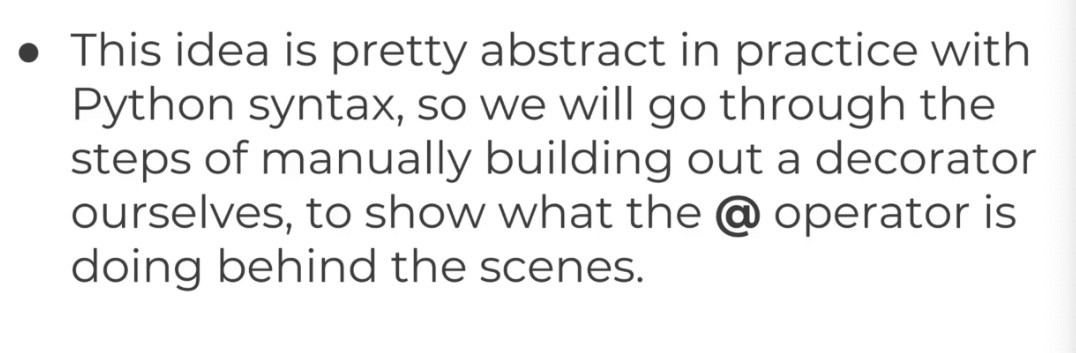

***

In [2]:
def func():
    return 1

In [3]:
func()

1

In [5]:
func
# this just tells you about the function without executing it -- ir withouth ()

<function __main__.func()>

In [6]:
def hello():
    return "Hello"

In [7]:
hello()

'Hello'

In [8]:
hello

<function __main__.hello()>

In [9]:
greet = hello
# python does not complain when equating one function to another (without ())

In [10]:
greet()

'Hello'

In [11]:
# What we do not know is (1) is greet just pointing to hello or (2) did it make a copy

In [12]:
hello()

'Hello'

In [16]:
del hello
# delete the function

NameError: name 'hello' is not defined

In [14]:
hello

NameError: name 'hello' is not defined

In [17]:
greet

<function __main__.hello()>

In [18]:
greet()

'Hello'

In [19]:
# SO GREET MADE A COPY OF HELLO

***

In [20]:
# Calling functions withing other functions

In [21]:
def hello(name = 'Ziba'):
    print('The hello() function has been executed')


In [22]:
hello()

The hello() function has been executed


***

In [25]:
def hello(name = 'Ziba'):
    print('The hello() function has been executed')
    
    # Define another function inside hello
    
    def greet():
        return '\t This is the greet () func inside hello!'

In [26]:
hello()
# notice we are only calling hello() and not explicitely calling greet()

The hello() function has been executed


***

In [29]:
# Now let us explicitely call greet() as well

def hello(name = 'Ziba'):
    print('The hello() function has been executed')
    
    # Define another function inside hello
    
    def greet():
        return '\t This is the greet () func inside hello!'
    
    print(greet())
    # Notice the indentation is with hello and not greet

In [30]:
hello()

The hello() function has been executed
	 This is the greet () func inside hello!


***

In [35]:
# Now let us define another function as well

# Now let us explicitely call greet() as well

def hello(name = 'Ziba'):
    print('The hello() function has been executed')
    
    # Define another function inside hello
    
    def greet():
        return '\t This is the greet () func inside hello!'
    
    def welcome():
            return '\t This welcome () inside hello!'
    
    print(greet())
    # Notice the indentation is with hello and not greet
    print(welcome())
    # Notice the indentation is with hello and not greet
    print('This is the endof the hello()')

In [36]:
hello()

The hello() function has been executed
	 This is the greet () func inside hello!
	 This welcome () inside hello!
This is the endof the hello()


In [38]:
# since greet() and welcome() are defined inside the hello(), their scope is limited 
# You cannot call welcome() outside the function or independently

welcome()

NameError: name 'welcome' is not defined

***

<font size = 4, color = blue> What if we need to access welcome() and greet() outside hello()?

In [40]:
# make changes for the hello() to RETURN greet and NOT PRINT it

def hello(name = 'Ziba'):
    print('The hello() function has been executed')
    
    # Define another function inside hello
    
    def greet():
        return '\t This is the greet () func inside hello!'
    
    def welcome():
            return '\t This welcome () inside hello!'
    
    print("I am going to return a function")
    
    if name == 'Ziba':
        return greet
    else:
        return welcome

In [43]:
## LIKE ABOVE, CREATE A NEW FUNCTION BY REFERENCING AN EXISTING ONE

# MY_NEW_FUNC is a function (not a variable)

my_new_func = hello('Ziba')

The hello() function has been executed
I am going to return a function


In [45]:
my_new_func
# notice that it is pointing to the greet function

<function __main__.hello.<locals>.greet()>

In [46]:
#Now execute teh my_new_func()

my_new_func()

'\t This is the greet () func inside hello!'

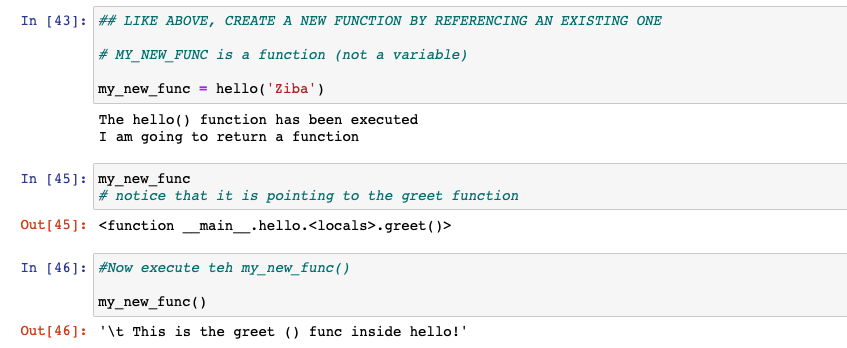

<font size = 4, color = red> Notice the difference between assigning and calling the function

In [47]:
print(my_new_func())

	 This is the greet () func inside hello!


***

In [48]:
def cool():
    
    def super_cool():
        return "I am very cool"
    
    return super_cool

In [49]:
some_func = cool()

In [50]:
some_func

<function __main__.cool.<locals>.super_cool()>

In [51]:
some_func()

'I am very cool'


***


***

<font size = 5> passing in a function as an argument

In [53]:
def hello():
    return "Hi Ziba"

In [54]:
# Pass a function as an argument (where some_def_func is passed as an argument)

def other(some_def_func):
    print("Other code runs here")
    print(some_def_func())

In [57]:
hello

<function __main__.hello()>

In [58]:
hello()

'Hi Ziba'

In [59]:
# pass in the raw function hello (not executing it)
other(hello)

Other code runs here
Hi Ziba


***

<font size = 5> Creating a decorator

In [60]:
# on off switch
# Think of wrapping paper for decorating teh original box

In [62]:
def new_decorator(original_func):
    
    def wrap_func():
        # this represents the extra functionality you want to decorate the original func with
        
        print("Some extra code before the original function")
        
        original_func()
        
        print("Some extra code after the original function")
        
    
    return wrap_func

***

In [63]:
# A function needs additional functionality

def func_needs_decorator():
    
    print("I want to be decorator")

In [64]:
func_needs_decorator()

I want to be decorator


In [65]:
# what we need is to add in some extra code to func_needs_decorator()

In [66]:
new_decorator(func_needs_decorator)
#Notice you are not execting func_needs_decorator 

<function __main__.new_decorator.<locals>.wrap_func()>

In [68]:
# Final/new decorated function that combines both

decorated_function = new_decorator(func_needs_decorator)

In [70]:
# Now call the decorated_function

decorated_function()

Some extra code before the original function
I want to be decorator
Some extra code after the original function


***

<font size = 6> Using the @ Operator to simplify

In [71]:
# Repeating the whole thing with the @ operator

@new_decorator

def func_needs_decorator():
    print("I want to be decorated")

In [72]:
func_needs_decorator()

Some extra code before the original function
I want to be decorated
Some extra code after the original function


In [ ]:
# This basically simplifies the following lines

# func_needs_decorator()
# new_decorator(func_needs_decorator)
# decorated_function = new_decorator(func_needs_decorator)
# decorated_function()


<font size = 4> The On/Off Switch --- @ operator

In [73]:
# @new_decorator

def func_needs_decorator():
    print("I want to be decorated")

In [74]:
func_needs_decorator()

I want to be decorated


<font size = 5, color = red> Commonly used in web frameworks like Django or Flask